In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

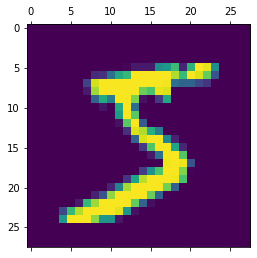

In [11]:
# to see how first image look
plt.matshow(x_train[0])

In [12]:
# normalise the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                         keras.layers.Dense(128, activation = 'relu'),
                         keras.layers.Dense(10, activation = 'softmax')])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6574 - accuracy: 0.8360 - val_loss: 0.3600 - val_accuracy: 0.9011
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.9056 - val_loss: 0.2936 - val_accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2877 - accuracy: 0.9194 - val_loss: 0.2600 - val_accuracy: 0.9294
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9285 - val_loss: 0.2369 - val_accuracy: 0.9343
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2349 - accuracy: 0.9343 - val_loss: 0.2184 - val_accuracy: 0.9384
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2168 - accuracy: 0.9400 - val_loss: 0.2049 - val_accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2015 - accuracy: 0.9439 - val_loss: 0.1927 - val_accuracy:

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test loss = %.3f"%test_loss)
print("Test Accuracy = %.3f"% test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9511
Test loss = 0.164
Test Accuracy = 0.951


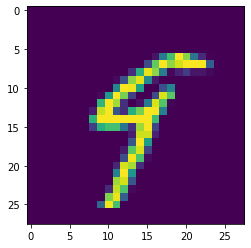

In [19]:
no = random.randint(0,9999)
plt.imshow(x_test[no])
plt.show()


In [20]:
predicted_value = model.predict(x_test)
print("Handwritten number in the image is : %d"%np.argmax(predicted_value[no]))

313/313 [==============================] - 0s 1ms/step
Handwritten number in the image is : 9


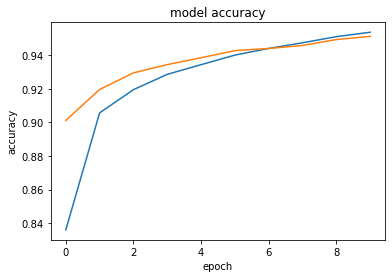

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

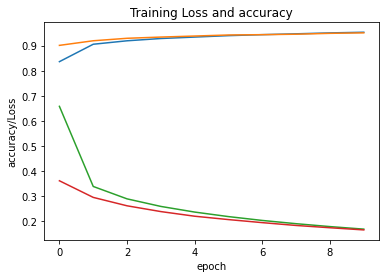

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.show()